In [1]:
import sys, os; 
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from src.detr.detr import build_detr
from src.data.dataset import CPPE5Dataset, collate_fn
from src.losses.loss import DETRLoss
from src.data.utils import visualize_output
import src.data.transforms as T
from experiment.detr_config import DETRCPPEConfigSanityCheck
from experiment.detr_cppe5_experiment import DETRCPPE5Experiment
from runner.detr_runner import DETRRunner

from torch.utils.data import DataLoader

import torch
import numpy as np
import random

In [3]:
exp = DETRCPPE5Experiment()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
!source ../.env

In [5]:
torch.manual_seed(exp.random_seed)
np.random.seed(exp.random_seed)
random.seed(exp.random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(exp.random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
loss_fn = DETRLoss()
dataset = CPPE5Dataset('../assets/CPPE-5', partition='val')
data_loader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=2,
    collate_fn=collate_fn
)

In [7]:
data = None
for data_batch in data_loader:
    data = data_batch
    break

In [8]:
visualization = visualize_output(
    imgs=data['images'],
    masks=data['masks'],
    image_ids=data['targets']['image_id'],
    gt_labs=data['targets']['labels'],
    gt_bboxes=data['targets']['boxes'],
    out_labs=data['targets']['labels'],
    out_bboxes=data['targets']['boxes']
)

In [9]:
dataset.boxes[0]

[tensor([160.,  57., 277., 161.]),
 tensor([565., 339., 632., 395.]),
 tensor([ 62., 421., 111., 498.]),
 tensor([336., 437., 449., 499.]),
 tensor([111.,   0., 359., 189.]),
 tensor([  0.,   3., 544., 495.])]

In [10]:
print(data['targets']['boxes'][0])

tensor([[222.1667,  79.1603, 384.6260, 223.5932],
        [784.5261, 470.7956, 877.5583, 548.5671],
        [ 86.0896, 584.6754, 154.1281, 691.6113],
        [466.5500, 606.8958, 623.4552, 693.0000],
        [154.1281,   0.0000, 498.4865, 262.4790],
        [  0.0000,   4.1663, 755.3666, 687.4449]])


In [11]:
T.ToTensor()(dataset.images[0], None)[0].shape

torch.Size([3, 499, 960])

In [12]:
unormalize = T.UnNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [13]:
data['images'][0].shape

torch.Size([3, 693, 1333])

In [14]:
unormalize(data['images'][0], {'boxes': data['targets']['boxes'][0]})

(tensor([[[0.3412, 0.3412, 0.3412,  ..., 0.3647, 0.3608, 0.3569],
          [0.3412, 0.3412, 0.3412,  ..., 0.3647, 0.3608, 0.3569],
          [0.3412, 0.3412, 0.3412,  ..., 0.3647, 0.3608, 0.3569],
          ...,
          [0.4706, 0.4745, 0.4784,  ..., 0.3686, 0.3686, 0.3686],
          [0.4706, 0.4745, 0.4784,  ..., 0.3686, 0.3686, 0.3686],
          [0.4706, 0.4745, 0.4745,  ..., 0.3725, 0.3725, 0.3725]],
 
         [[0.3373, 0.3373, 0.3373,  ..., 0.3647, 0.3608, 0.3569],
          [0.3373, 0.3373, 0.3373,  ..., 0.3647, 0.3608, 0.3569],
          [0.3373, 0.3373, 0.3373,  ..., 0.3647, 0.3608, 0.3569],
          ...,
          [0.5098, 0.5137, 0.5176,  ..., 0.3725, 0.3725, 0.3725],
          [0.5098, 0.5137, 0.5176,  ..., 0.3725, 0.3725, 0.3725],
          [0.5098, 0.5137, 0.5137,  ..., 0.3765, 0.3765, 0.3765]],
 
         [[0.3294, 0.3294, 0.3294,  ..., 0.3569, 0.3529, 0.3490],
          [0.3294, 0.3294, 0.3294,  ..., 0.3569, 0.3529, 0.3490],
          [0.3294, 0.3294, 0.3294,  ...,

In [16]:
import PIL

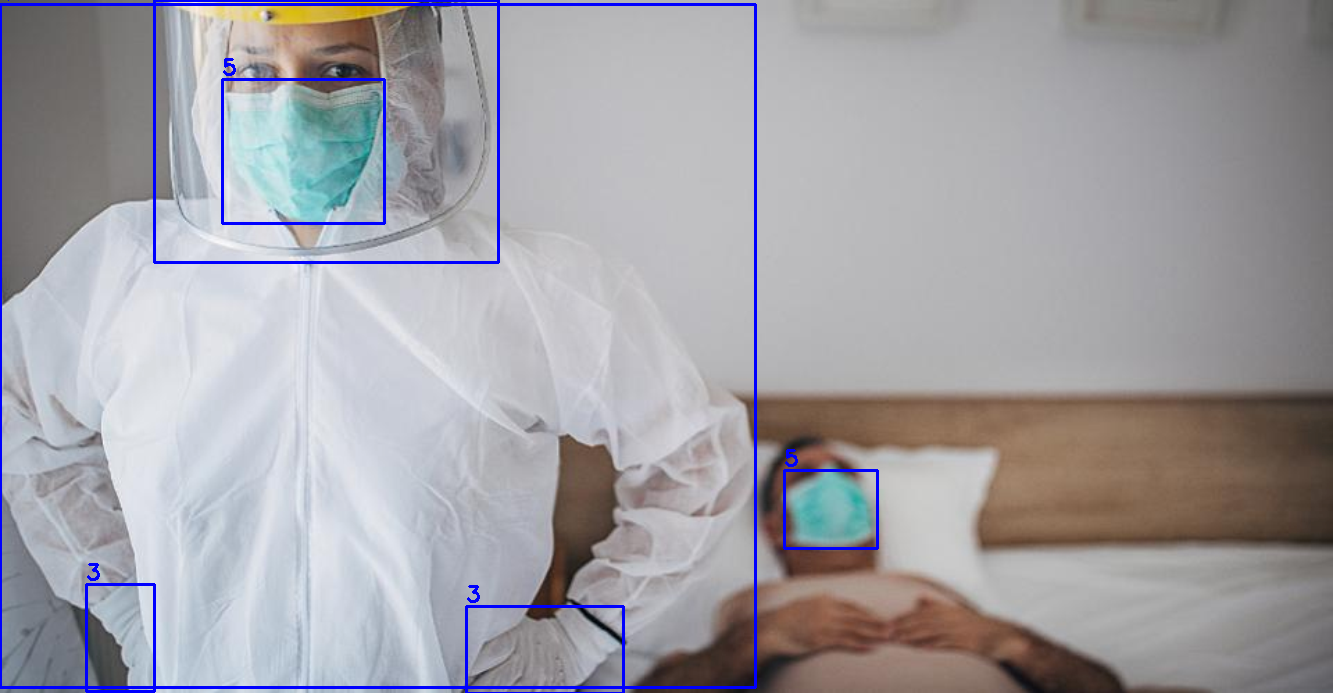

In [17]:
PIL.Image.fromarray(visualization[1001])